# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

hospital_read_df.head(5)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [3]:
hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


****
## Preliminary Analysis

In [4]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = pd.to_numeric(clean_hospital_read_df['Number of Discharges'], int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges', ascending=False)

# DENNIS: filter out NaNs
clean_hospital_read_df = clean_hospital_read_df[
    clean_hospital_read_df['Excess Readmission Ratio'].notnull() &
    clean_hospital_read_df['Number of Readmissions'].notnull() ]

clean_hospital_read_df.head(5)

/Users/dennisgheldolf/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013


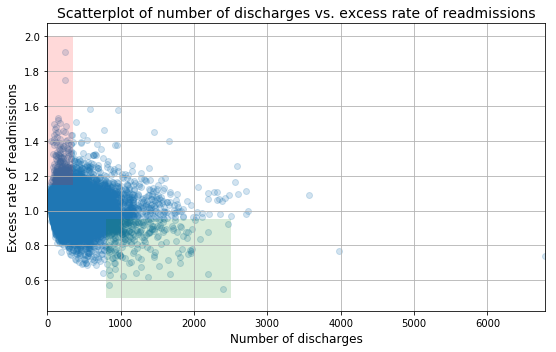

In [5]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges']] #[81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio']) #[81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

#### Dennis: this appears true to some extent, but given the large mass of data around y=1.1, this may be a weak relationship. Recommend a regression analysis. Furthermore, above ca. 2,000 discharges, this relationship inverts (hinting at a convex curve, second order relationship).


**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

#### Dennis: why these cut-offs? Are there large differences between these buckets? What is the global readmission rate and distribution? 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 

#### What is the correlation coefficient? Given the overall shape of the data, I doubt this correlation is significant.

+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

#### Other explenations are possible (eg. less organizational experience due to lower volume), or there may be other variables at play (eg. location, hospital age, ..).

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.

#### Why less than 300? This is the first time this number is mentioned.

+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

#### This is a dangerous recommendation. If these hospitals have another underlying problem, consolidation will not solve the problem.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

**See commentary in BOLD in cell above**
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

****
## Data Cleaning and Descriptive Stats

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
# Using pd.to_numeric avoids SettingWithCopyWarning warning.
clean_hospital_read_df.loc[:, 'Number of Discharges'] = pd.to_numeric(clean_hospital_read_df['Number of Discharges'], int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges', ascending=False)

# filter out NaNs
clean_hospital_read_df = clean_hospital_read_df[
    clean_hospital_read_df['Excess Readmission Ratio'].notnull() &
    clean_hospital_read_df['Number of Readmissions'].notnull() ]

# reset index after cleaning
clean_hospital_read_df.reset_index(inplace=True)

clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].describe()

,Number of Discharges,Excess Readmission Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


## Determine the regression lines

In [7]:
x_df = clean_hospital_read_df['Number of Discharges']
y_df = clean_hospital_read_df['Excess Readmission Ratio']

# Linear regression
slope, intercept = np.polyfit(x_df, y_df, deg=1)
print('Lin.Reg.:\t\t %.5f x + %.3f' % (slope, intercept))

# Second order regression
m, n, k = np.polyfit(x_df, y_df, deg=2)
print('Second Order Reg.:\t %.5f x**2 + %.5f x + %.3f' % (m, n, k))

Lin.Reg.:		 -0.00003 x + 1.018
Second Order Reg.:	 0.00000 x**2 + -0.00003 x + 1.018


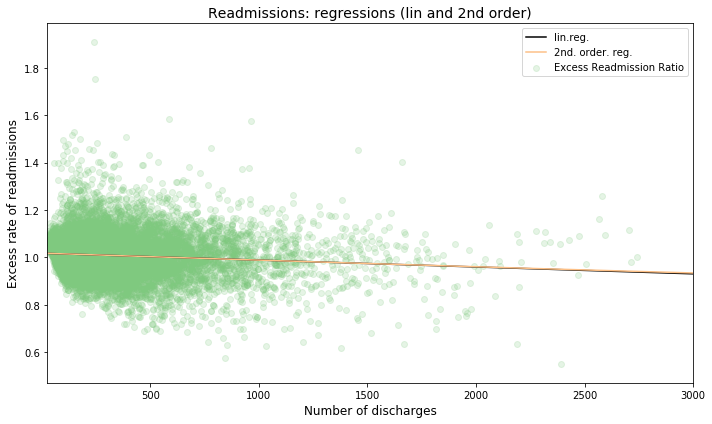

In [8]:
plt.subplots(figsize=(10, 6))

plt.scatter(x_df, y_df,alpha=0.2, color='#7fc97f') #green
plt.plot(x_df, intercept + slope * x_df, '-', color='black', label='lin.reg.') 
plt.plot(x_df, m * x_df**2 + n * x_df + k, '-', color='#fdc086', label='2nd. order. reg.') #orange
plt.legend(loc='upper right')

plt.xlim([min(x), 3000])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Readmissions: regressions (lin and 2nd order)', fontsize=14)

plt.tight_layout()

The second-order regression line (orange) closely follows the linear regression line (black). The increased predictive power is likely not worth the added complexity (eg. there are no inversions - the overall slope is down overall).

The linear regression line has a very shallow slope.  
In fact, an appropriate Null hypothesis here is that  
**H0: there is no relationship between discharges and excess rate of readmissions**.

In [9]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate replicates of slope and intercept using pairs bootstrap
n_reps = 500
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_df, y_df, n_reps)

99% CI for slope [-3.75342065e-05 -2.07411542e-05]
99% CI for intercept [1.01460294 1.02166217]
p-value of 0.000


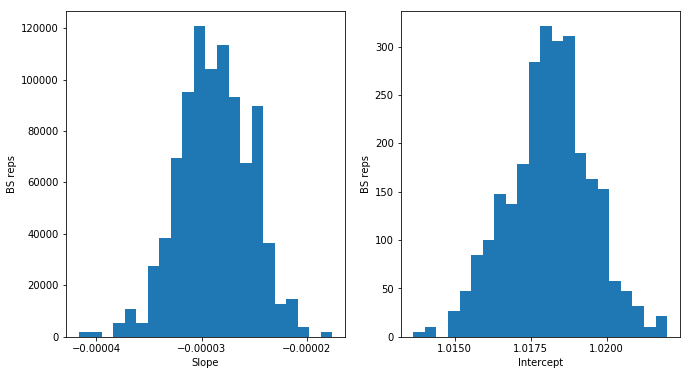

In [10]:
# Compute and print 99% CI for slope
slope_99ci = np.percentile(bs_slope_reps, [0.5, 99.5])
icept_99ci = np.percentile(bs_intercept_reps, [0.5, 99.5])

print('99% CI for slope', slope_99ci)
print('99% CI for intercept', icept_99ci)

pval = sum(bs_slope_reps > 0)/len(bs_slope_reps)
print('p-value of %.3f' % pval)

# Plot the histogram
plt.subplots(figsize=(11, 6))
plt.subplot(1,2,1)
_ = plt.hist(bs_slope_reps, bins=int(n_reps**0.5), density=True)
_ = plt.xlabel('Slope')
_ = plt.ylabel('BS reps')
_ = plt.locator_params(axis='x', nbins=4)
plt.subplot(1,2,2)
_ = plt.hist(bs_intercept_reps, bins=int(n_reps**0.5), density=True)
_ = plt.xlabel('Intercept')
_ = plt.ylabel('BS reps')
_ = plt.locator_params(axis='x', nbins=4)
plt.show()

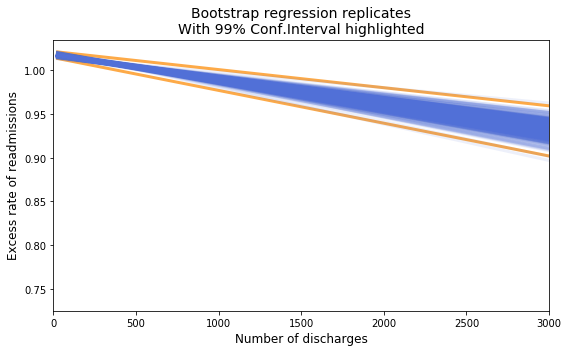

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x_df, icept_99ci[1] + slope_99ci[1] * x_df, '-', linewidth=3, color='xkcd:light orange', alpha=1) 
plt.plot(x_df, icept_99ci[0] + slope_99ci[0] * x_df, '-', linewidth=3, color='xkcd:light orange', alpha=1) 

for a, b in zip(bs_intercept_reps, bs_slope_reps):
    plt.plot(x_df, a + b * x_df, '-', linewidth=3, color='xkcd:cornflower blue', alpha=0.1) 

ax.set_xlim([0, 3000])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Bootstrap regression replicates\nWith 99% Conf.Interval highlighted', fontsize=14)

fig.tight_layout()

In [12]:
print('''For every 100 additional discharges, the Excess Readmission Ratio changes by approx. %.3f points, 
99pct CI: %.3f and %.3f points''' % (100*np.mean(slope_99ci), 100*slope_99ci[0], 100*slope_99ci[1]))

cutoff_ERR100 = (1.00 - np.mean(icept_99ci))/np.mean(slope_99ci)
print('Cut-off for ERR of 1.00: %.0f' % (cutoff_ERR100))

For every 100 additional discharges, the Excess Readmission Ratio changes by approx. -0.003 points, 
99pct CI: -0.004 and -0.002 points
Cut-off for ERR of 1.00: 622


***
## Conclusion and Policy Recommendations

There is a statistically significant (p = 0.00) linear relationship between excess rate of readmissions and number of discharges. For every 100 additional discharges, the ERR decreases by approx. 0.003 points.  

Hospitals with less than 630 discharges ("Small hospitals") have on average an ERR above 1.

1. **Conduct qualitative interviews** with the high and low outliers (interface provided in appendix), both for small and large hospitals (< > 630 discharges).
2. Based on the results of these interviews, develop a **set of 'Best Practices' for small and large hospitals**.
3. Required a **demonstrated compliance** to these best practices for further financial assistance.
4. Conduct a **follow-up analysis** 12 months after implementation to understand whether there have been significant improvements in ERR.

***
## APPENDIX: A funtion to access high/low rate outliers for small and large hospitals

In [13]:
large_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= int(cutoff_ERR100)]
small_hosp = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < int(cutoff_ERR100)]

assert len(large_hosp) + len(small_hosp) == len(clean_hospital_read_df)

def list_sorted_outliers(dataset, high=True, percentile=0.5):
    """Returns the high(True) or low n percentile of dataset, sorted appropriately"""
    if high:
        pctileval = 100 - percentile
        results = dataset[dataset['Excess Readmission Ratio'] 
               > np.percentile(dataset['Excess Readmission Ratio'], pctileval)]
        asc_bool = False
    else:
        pctileval = percentile
        results = dataset[dataset['Excess Readmission Ratio'] 
               < np.percentile(dataset['Excess Readmission Ratio'], pctileval)]
        asc_bool = True
    results_sorted = results.sort_values(by='Excess Readmission Ratio', ascending=asc_bool)
    return results_sorted.reset_index()

In [14]:
list_sorted_outliers(small_hosp, high=False, percentile=0.5)

,level_0,index,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,2204,13713,MEADVILLE MEDICAL CENTER,390113,PA,READM-30-HIP-KNEE-HRRP,545,NaN,0.6905,4.0,5.7,15.0,07/01/2010,06/30/2013
1,2890,13712,INDIANA UNIVERSITY HEALTH BLOOMINGTON HOSPITAL,150051,IN,READM-30-HIP-KNEE-HRRP,473,NaN,0.6914,3.7,5.3,11.0,07/01/2010,06/30/2013
2,2391,13707,ORTHOPAEDIC HOSPITAL OF WISCONSIN,520194,WI,READM-30-HIP-KNEE-HRRP,526,NaN,0.6994,3.3,4.7,11.0,07/01/2010,06/30/2013
3,2764,13706,BILLINGS CLINIC HOSPITAL,270004,MT,READM-30-HF-HRRP,484,NaN,0.6997,14.6,20.8,51.0,07/01/2010,06/30/2013
4,2397,13703,PORTNEUF MEDICAL CENTER,130028,ID,READM-30-HIP-KNEE-HRRP,525,NaN,0.7016,3.5,5.0,12.0,07/01/2010,06/30/2013
5,3380,13701,MARQUETTE GENERAL HOSPITAL,230054,MI,READM-30-HIP-KNEE-HRRP,427,NaN,0.7048,4.0,5.7,11.0,07/01/2010,06/30/2013
6,1674,13698,SIOUXLAND SURGERY CENTER LIMITED PARTNERSHIP,430089,SD,READM-30-HIP-KNEE-HRRP,618,NaN,0.7062,3.2,4.6,14.0,07/01/2010,06/30/2013
7,3887,13693,PHELPS MEMORIAL HOSPITAL ASSN,330261,NY,READM-30-HIP-KNEE-HRRP,390,NaN,0.7181,4.3,6.0,11.0,07/01/2010,06/30/2013
8,2508,13691,MAYO CLINIC HEALTH SYSTEM EAU CLAIRE HOSPITAL,520070,WI,READM-30-HIP-KNEE-HRRP,512,NaN,0.7187,3.5,4.8,12.0,07/01/2010,06/30/2013
9,2552,13690,SAINT VINCENT MEDICAL CENTER,50502,CA,READM-30-HIP-KNEE-HRRP,507,NaN,0.7203,4.3,6.0,16.0,07/01/2010,06/30/2013
